In [1]:
import pandas as pd
import boxball_loader as bbl

In [6]:
ev = bbl.load_event_data(start_yr=2010, end_yr=2019, requested_columns=['bat_last_id', 'inn_ct'])
ev.shape

(1876441, 11)

In [7]:
ev.columns

Index(['game_id', 'date', 'inn_ct', 'event_cd', 'ab_fl', 'tb_ct',
       'bat_event_fl', 'bat_last_id', 'h_fl', 'ob_fl', 'yr'],
      dtype='object')

In [20]:
ibb = ev[(ev['event_cd']==15)]

In [21]:
ibb.groupby(['bat_last_id', 'inn_ct'])['event_cd'].count() 

bat_last_id  inn_ct
0            1         120
             2         264
             3         293
             4         417
             5         517
             6         611
             7         648
             8         753
             9         728
             10        241
             11        129
             12         87
             13         58
             14         32
             15         16
             16          8
             17          5
             18          4
             19          2
1            1         122
             2         288
             3         331
             4         471
             5         597
             6         630
             7         813
             8         928
             9         522
             10        278
             11        164
             12         75
             13         53
             14         28
             15         17
             16          9
             17          5
        

<AxesSubplot:xlabel='inn_ct'>

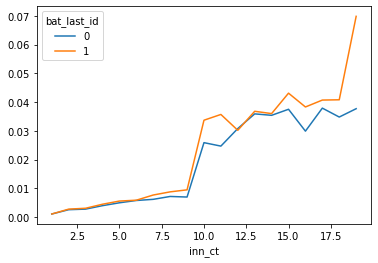

In [28]:
# ibb frequencies (per PA or event)
def summarize(pa):
    return pa.groupby(['inn_ct', 'bat_last_id'])['event_cd'].count()

(summarize(ibb) / summarize(ev)).round(4).unstack().plot()